Manipulate trajectories of evolved solutions into other pyloric archetypes to preserve their relative timing and test whether the fitness function recognizes them

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
outputs = np.loadtxt('./Specifically Evolved HP mechanisms/Every Circuit/0/outputtrack.dat')
print(outputs.shape)

(10000, 3)


In [7]:
time = np.arange(0,100,0.01)

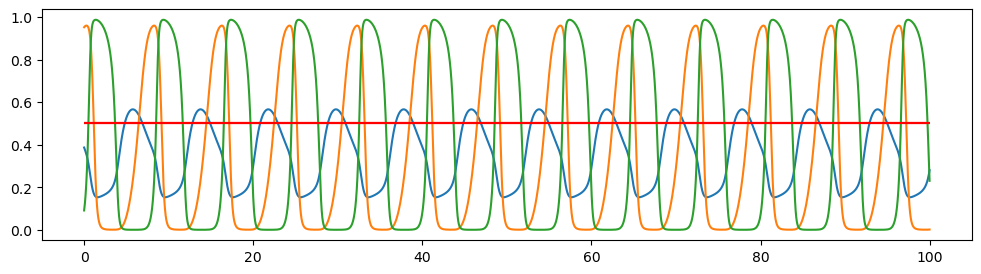

In [26]:
plt.rcParams['figure.figsize']=(12,3)
for i in range(len(outputs[0])):
    plt.plot(time,outputs[:,i])
    plt.hlines(.5,time[0],time[-1],color='r')

In [28]:
#shift PY up by x timesteps
x = 110

shifted_outputs = np.zeros_like(outputs)
shifted_outputs[:,0::2] = outputs[:,0::2]
shifted_outputs[:-x,1] = outputs[x:,1]
shifted_outputs = shifted_outputs[:-x,:]
print(shifted_outputs)

[[0.386869   0.556151   0.0910508 ]
 [0.38583    0.54268    0.0942243 ]
 [0.384785   0.529139   0.0975051 ]
 ...
 [0.174607   0.00136613 0.89565   ]
 [0.174913   0.00141393 0.894023  ]
 [0.175222   0.00146441 0.892369  ]]


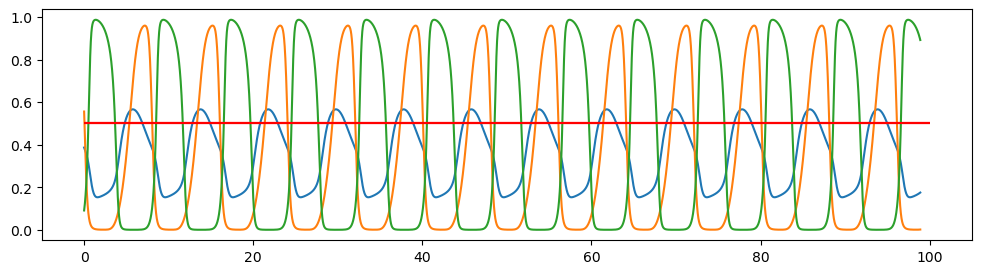

In [29]:
plt.rcParams['figure.figsize']=(12,3)
for i in range(len(outputs[0])):
    plt.plot(time[:-x],shifted_outputs[:,i])
    plt.hlines(.5,time[0],time[-1],color='r')

In [30]:
#output this shifted timeseries to a new file
np.savetxt('./Specifically Evolved HP mechanisms/Every Circuit/0/shiftedoutputs.dat',shifted_outputs)

This shifted time series does indeed register as pyloric under our original criteria. Which means that the specific ordering achieved by all our evolved solutions fell out of delay and duty cycle requirements.

To understand why that is, what if you had the ideal (mean) value for every metric?

(all relative to PDstart)

LPdc = .264

PYdc = .348

PDdc = .385

LPdelay = .533

PYdelay = .758

In [43]:
test_timeseries = np.zeros((1000,3))
test_timeseries[533:533+264,0] = np.ones_like(test_timeseries[533:533+264,0])
test_timeseries[758:758+348,1] = np.ones_like(test_timeseries[758:758+348,1])
test_timeseries[0:(758+348)%1000,1] = np.ones_like(test_timeseries[0:(758+348)%1000,1])
test_timeseries[0:385,2] = np.ones_like(test_timeseries[0:385,2])

long = np.tile(test_timeseries.T,3).T

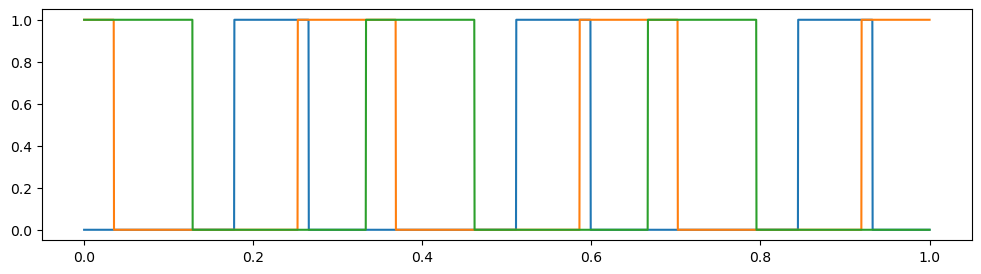

In [44]:
for i in range(len(outputs[0])):
    plt.plot(np.linspace(0,1,3000),long[:,i])

You do get the exact ordering that evolution produced. Therefore, we've concluded that, although it was possible for evolution to produce different orders, it produced the same one over and over because of timing awards. If we wanted to explore different orders that are still pyloric, we would need to re-evolve without timing awards, or for a shorter number of generations